<a href="https://colab.research.google.com/github/seasighter/regression_model-using-tensorflow/blob/main/Tensorflow_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# regression model

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-12-28 06:42:41--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-12-28 06:42:42 (17.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
# load data
!head moore.csv
 # there is no header


1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
data =pd.read_csv("moore.csv", header=None).to_numpy()
data.shape

(162, 2)

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
x=data[:,0]
#x.ndim # here dimension in 1 which will throw error
x=x.reshape(-1,1)   # reshaping the x to become the dimension ()
x.ndim #Now the dimension becomes 2

2

In [ ]:
y=data[:,1]


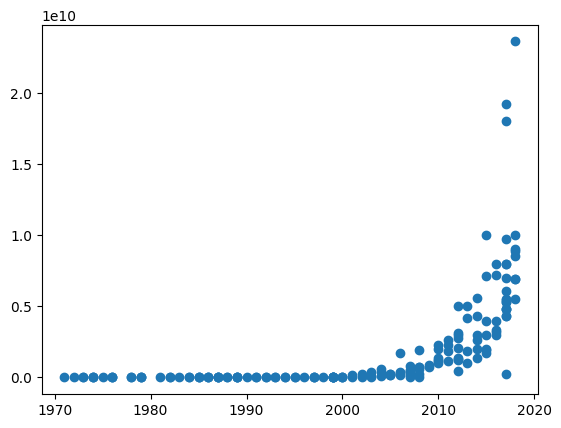

In [ ]:
plt.scatter(x,y);

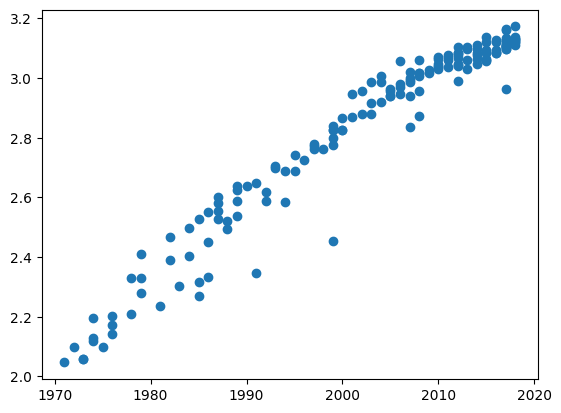

In [ ]:
# performing log we need linear model and it is exponential growth so we apply log
y=np.log(y)
plt.scatter(x,y);# it will print a linear line


In [ ]:
x=x-x.mean()

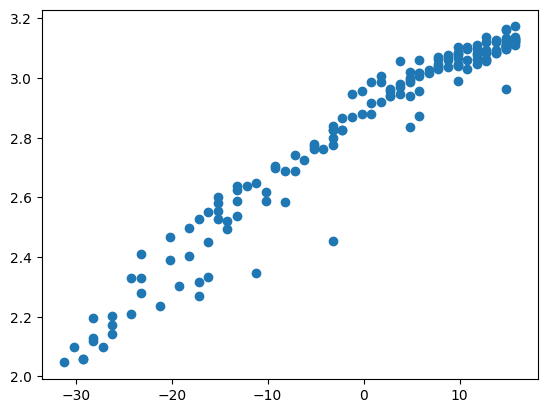

In [ ]:
plt.scatter(x,y)

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), # input shape is 1
    tf.keras.layers.Dense(1) # output sahpe
])

In [83]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [84]:
# function for learning rate scheduliing
def schedule(epoch , lr):
  if epoch>50:
    return 0.0001
  return 0.001
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)


In [85]:
r=model.fit(x,y,epochs=70,callbacks=[scheduler])

Epoch 1/70
6/6 [==============================] - 0s 4ms/step - loss: 0.0055 - lr: 0.0010
Epoch 2/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0056 - lr: 0.0010
Epoch 3/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0061 - lr: 0.0010
Epoch 4/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0056 - lr: 0.0010
Epoch 5/70
6/6 [==============================] - 0s 2ms/step - loss: 0.0057 - lr: 0.0010
Epoch 6/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0055 - lr: 0.0010
Epoch 7/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0055 - lr: 0.0010
Epoch 8/70
6/6 [==============================] - 0s 2ms/step - loss: 0.0053 - lr: 0.0010
Epoch 9/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0065 - lr: 0.0010
Epoch 10/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0061 - lr: 0.0010
Epoch 11/70
6/6 [==============================] - 0s 3ms/step - loss: 0.0055 - lr: 0.0010
Epoch 12

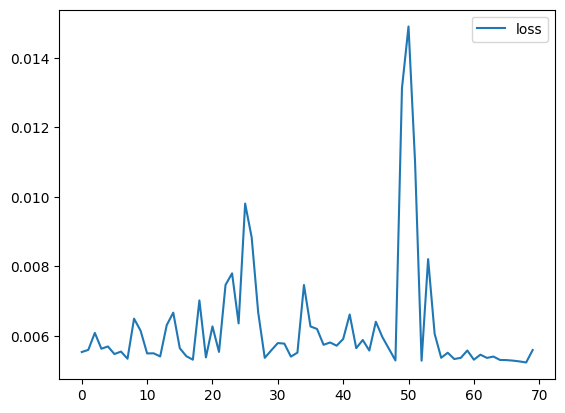

In [86]:
plt.plot(r.history['loss'],label="loss")
plt.legend();

In [87]:
# to check the layers
model.layers

In [88]:
model.layers[0].get_weights()

[array([[0.02420106]], dtype=float32), array([2.829876], dtype=float32)]

In [89]:
a=model.layers[0].get_weights()[0][0,0]

In [90]:
a

0.02420106

In [91]:
print("Time to double:" ,np.log(2)/a)

Time to double: 28.64119128469912
